<a href="https://colab.research.google.com/github/amanda-veiga-furtado/TCC/blob/main/Analytics_%7C_Specialisterne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Acompanhamento de Vendedores


## Inserção das Bibliotecas e do Arquivo Excel


In [5]:
import pandas as pd  # Importa a biblioteca pandas para manipulação de dados
import numpy as np  # Importa a biblioteca NumPy para operações numéricas
import seaborn as sns  # Importa a biblioteca Seaborn para visualização de dados
import matplotlib.pyplot as plt  # Importa a biblioteca Matplotlib para gráficos
plt.style.use('ggplot')  # Define o estilo dos gráficos para 'ggplot'

rh = pd.read_excel('analytics.xlsx') # Carregar o arquivo Excel

# Função para carregar e processar a planilha (pulando linhas e limitando o número de linhas carregadas)
def carregar_planilha(arquivo, nome_planilha, linhas_skip=6, linhas_n=31): # Carregar a folha e pular as primeiras linhas de cabeçalho
    data = pd.read_excel(arquivo, sheet_name=nome_planilha, skiprows=linhas_skip, nrows=linhas_n)

    # Renomear as colunas para facilitar a referência
    data.columns = [
        "Celula_Vazia_1", "Data", "Celula_Vazia_2", "Venda Real", "Venda Projetada", "Diferença","Celula_Vazia_3", "Acumulado Real", "Acumulado Projetado",
        "Celula_Vazia_4", "Planejamento Futuro", "Tendência", "Celula_Vazia_5", "Clientes Abordados", "Vendas Fechadas", "Taxa de Conversão"
    ]

    # Remover colunas que não são necessárias
    data = data.drop(columns=["Celula_Vazia_1", "Celula_Vazia_2", "Celula_Vazia_3", "Celula_Vazia_4", "Celula_Vazia_5"])

    # Converter a coluna "Data" para o formato de data
    data['Data'] = pd.to_datetime(data['Data'], errors='coerce')

    return data # Retorna o DataFrame processado

# Nome do arquivo
arquivo_excel = 'analytics.xlsx'

# Carregar as planilhas desejadas
dados_acompanhamento_ana = carregar_planilha(arquivo_excel, 'Acompanhamento Ana')
dados_acompanhamento_joao = carregar_planilha(arquivo_excel, 'Acompanhamento Joao')
dados_acompanhamento_jose = carregar_planilha(arquivo_excel, 'Acompanhamento Jose')

# Exibir as primeiras linhas das planilhas carregadas
# print(dados_acompanhamento_ana.head())
# print(dados_acompanhamento_joao.head())
# print(dados_acompanhamento_jose.head())


##Vendas Reais dos Funcionários e Vendas Projetadas

###Média de Vendas Diárias

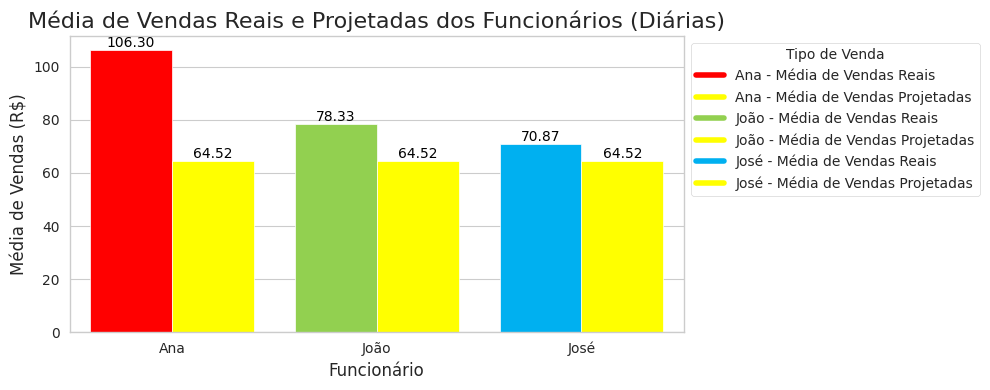

In [6]:
# Função para calcular médias
def calcular_media(dados, tipo_venda):
    return dados[tipo_venda].mean()

# Calcular médias
funcionarios = ['Ana', 'João', 'José']
dados_media = pd.DataFrame({
    'Funcionário': funcionarios,
    'Média de Vendas Reais': [calcular_media(dados_acompanhamento_ana, 'Venda Real'),
                              calcular_media(dados_acompanhamento_joao, 'Venda Real'),
                              calcular_media(dados_acompanhamento_jose, 'Venda Real')],
    'Média de Vendas Projetadas': [calcular_media(dados_acompanhamento_ana, 'Venda Projetada'),
                                   calcular_media(dados_acompanhamento_joao, 'Venda Projetada'),
                                   calcular_media(dados_acompanhamento_jose, 'Venda Projetada')]
})

# Reorganizar os dados para o formato long (mais fácil para o seaborn)
dados_media = dados_media.melt(id_vars='Funcionário', var_name='Tipo de Venda', value_name='Média')

# Definir cores personalizadas para cada média de cada funcionário
cores_funcionarios = {
    'Ana - Média de Vendas Reais': '#FF0000',
    'João - Média de Vendas Reais': '#92D050',
    'José - Média de Vendas Reais': '#00B0F0',
    'Ana - Média de Vendas Projetadas': '#FFFF00',
    'João - Média de Vendas Projetadas': '#FFFF00',
    'José - Média de Vendas Projetadas': '#FFFF00'
}

# Mapear cores para cada linha no DataFrame
dados_media['Cores'] = dados_media.apply(lambda row: cores_funcionarios[f"{row['Funcionário']} - {row['Tipo de Venda']}"], axis=1)

# Configurar o gráfico de colunas
plt.figure(figsize=(10, 4))
sns.set_style("whitegrid")  # Estilo do gráfico

# Criar o gráfico com barras
ax = sns.barplot(data=dados_media, x='Funcionário', y='Média', hue='Tipo de Venda', dodge=True)

# Aplicar cores personalizadas
for p, cor in zip(ax.patches, dados_media['Cores']):
    p.set_facecolor(cor)

# Adicionar rótulos de valor nas barras
for p in ax.patches:
    if p.get_height() > 0:  # Verificar se a altura da barra é maior que zero
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

# Configurações do gráfico
plt.title("Média de Vendas Reais e Projetadas dos Funcionários (Diárias)", fontsize=16)
plt.xlabel("Funcionário", fontsize=12)
plt.ylabel("Média de Vendas (R$)", fontsize=12)
plt.xticks(rotation=0)

# Remover a legenda padrão e criar nova legenda personalizada
handles = []
labels = []
for funcionario in funcionarios:
    for tipo in ['Média de Vendas Reais', 'Média de Vendas Projetadas']:
        color = cores_funcionarios[f"{funcionario} - {tipo}"]
        handle = plt.Line2D([0], [0], color=color, lw=4)
        handles.append(handle)
        labels.append(f'{funcionario} - {tipo}')

plt.legend(handles, labels, title='Tipo de Venda', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()  # Ajusta o layout para não cortar elementos
plt.show()


*   Todos os vendedores estão alcançando suas metas diárias estabelecidas
*   Ana possui a maior média diária
*   João possui a segunda maior média diária
*   José possui a menor média diária


###Vendas Reais e Projeção Mensal

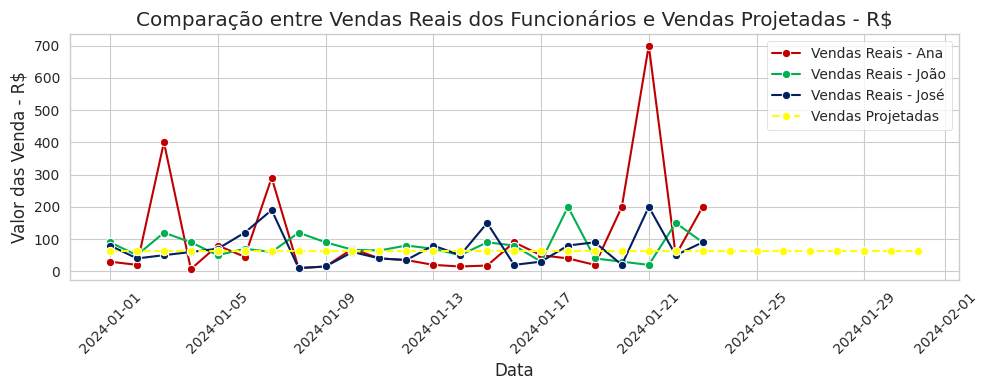

,Funcionário,Venda Projetada - R$ (Total),Vendas Fechadas - R$ (Total)
0,Ana,2000,2445
1,João,2000,1801
2,José,2000,1630


In [8]:
plt.figure(figsize=(10, 4))
# Vendas reais de Ana, João e José
sns.lineplot(data=dados_acompanhamento_ana, x='Data', y='Venda Real', marker='o', label='Vendas Reais - Ana', color='#C00000') # Gráfico de linha para as vendas reais de Ana
sns.lineplot(data=dados_acompanhamento_joao, x='Data', y='Venda Real', marker='o', label='Vendas Reais - João', color='#00B050')
sns.lineplot(data=dados_acompanhamento_jose, x='Data', y='Venda Real', marker='o', label='Vendas Reais - José', color='#002060')

sns.lineplot(data=dados_acompanhamento_jose, x='Data', y='Venda Projetada', marker='o', linestyle='--', label='Vendas Projetadas', color='#FFFF00')

plt.title("Comparação entre Vendas Reais dos Funcionários e Vendas Projetadas - R$")
plt.xlabel("Data")
plt.ylabel("Valor das Venda - R$")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show() # Exibe o gráfico gerado


# Função para criar uma tabela resumo com vendas
def criar_tabela_resumo(data, vendedor_nome):  # Define uma função que cria uma tabela resumo para um vendedor específico
    total_venda_projetada = data['Venda Projetada'].sum()  # Calcula a soma total das vendas projetadas
    total_venda_real = data['Venda Real'].sum()  # Calcula a soma total das vendas reais


    # Criar o DataFrame e converter valores apropriados para inteiros
    return pd.DataFrame({
        'Funcionário': [vendedor_nome],
        'Venda Projetada - R$ (Total)': [total_venda_projetada],
        'Vendas Fechadas - R$ (Total)': [total_venda_real],
    }).astype({
        'Venda Projetada - R$ (Total)': 'int',
        'Vendas Fechadas - R$ (Total)': 'int',
    })

# Crie tabelas de resumo individuais
ana_resumo = criar_tabela_resumo(dados_acompanhamento_ana, 'Ana')
joao_resumo = criar_tabela_resumo(dados_acompanhamento_joao, 'João')
jose_resumo = criar_tabela_resumo(dados_acompanhamento_jose, 'José')

# Concatena as tabelas em uma
tabela_resumo = pd.concat([ana_resumo, joao_resumo, jose_resumo], ignore_index=True)

#Exibe a tabela de resumo
tabela_resumo



* A Vendedora Ana teve o maior acumulo de vendas (R$)

* O Vendedor José teve o menor acumulo de vendas (R$)

* A Vendedora Ana já cumpriu a meta estabelecida nos primeiros 23 dias do Mês
* Os vendedores João e José ainda não conseguiram cumprir a meta estabelecida

## Clientes Abordados

### Clientes Abordados ao Longo do Tempo

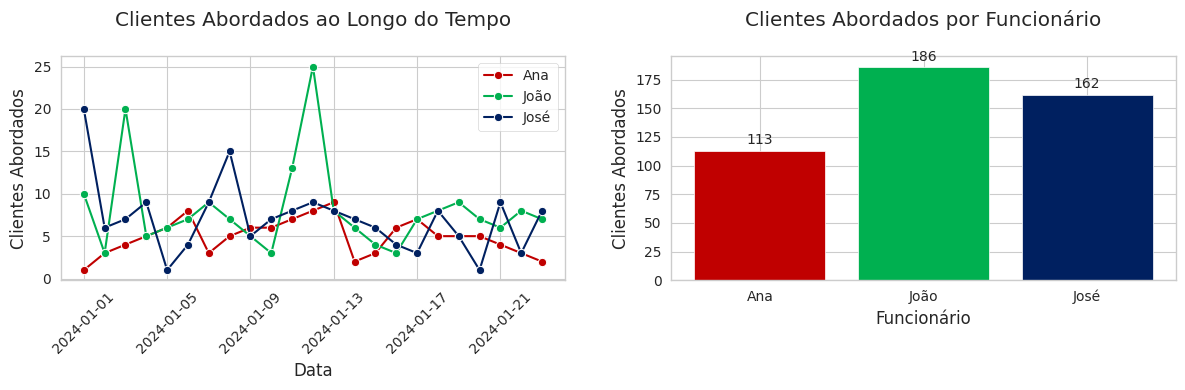

In [45]:
# Criando a figura com subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico de linha no primeiro subplot
sns.lineplot(data=dados_acompanhamento_ana, x='Data', y='Clientes Abordados', marker='o', label='Ana', color='#C00000', ax=axes[0])
sns.lineplot(data=dados_acompanhamento_joao, x='Data', y='Clientes Abordados', marker='o', label='João', color='#00B050', ax=axes[0])
sns.lineplot(data=dados_acompanhamento_jose, x='Data', y='Clientes Abordados', marker='o', label='José', color='#002060', ax=axes[0])

axes[0].set_title("Clientes Abordados ao Longo do Tempo\n")
axes[0].set_xlabel("Data")
axes[0].set_ylabel("Clientes Abordados")
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()

# Gráfico de barras no segundo subplot
funcionarios = ['Ana', 'João', 'José']
clientes_abordados = [113, 186, 162]
bars = axes[1].bar(funcionarios, clientes_abordados, color=['#C00000', '#00B050', '#002060'])
axes[1].set_xlabel('Funcionário')
axes[1].set_ylabel('Clientes Abordados')
axes[1].set_title('Clientes Abordados por Funcionário\n')

# Adicionando os números acima de cada barra
for bar, clientes in zip(bars, clientes_abordados):
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 3, str(clientes), ha='center', va='bottom')

# Ajustando o layout e adicionando espaço entre os gráficos
plt.subplots_adjust(wspace=15)  # Aumenta o espaço horizontal entre os gráficos
plt.tight_layout()
plt.show()


*  O Vendedor João possui a maior quantidade de clientes abordados
*  O Vendedor José possui a segunda maior quantidade de clientes abordados
*  A Vendedora Ana possui menor quantidade de clientes abordados


###Taxa de Conversão

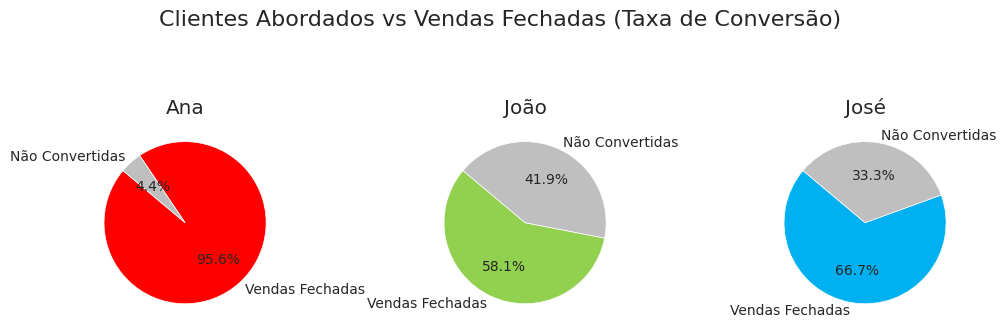

,Funcionário,Clientes Abordados,Vendas Fechadas,Taxa de Conversão (%)
0,Ana,113,108,95
1,João,186,108,58
2,José,162,108,66


In [46]:

def grafico_pizza(clientes_abordados, vendas_fechadas, nome_funcionario, cores):
    valores = [vendas_fechadas, clientes_abordados - vendas_fechadas]
    labels = ['Vendas Fechadas', 'Não Convertidas']

    plt.pie(valores, labels=labels, colors=cores, autopct='%1.1f%%', startangle=140)
    plt.title(nome_funcionario)  # Apenas o nome do funcionário em cada gráfico

cores_ana = ['#FF0000', '#BFBFBF']
cores_joao = ['#92D050', '#BFBFBF']
cores_jose = ['#00B0F0', '#BFBFBF']

# Criar uma figura com múltiplos gráficos
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
fig.suptitle("Clientes Abordados vs Vendas Fechadas (Taxa de Conversão %)", fontsize=16)  # Título geral da figura

# Gráfico para Ana
plt.subplot(1, 3, 1)
grafico_pizza(dados_acompanhamento_ana['Clientes Abordados'].sum(),
               dados_acompanhamento_ana['Vendas Fechadas'].sum(),
               'Ana', cores_ana)

# Gráfico para João
plt.subplot(1, 3, 2)
grafico_pizza(dados_acompanhamento_joao['Clientes Abordados'].sum(),
               dados_acompanhamento_joao['Vendas Fechadas'].sum(),
               'João', cores_joao)

# Gráfico para José
plt.subplot(1, 3, 3)
grafico_pizza(dados_acompanhamento_jose['Clientes Abordados'].sum(),
               dados_acompanhamento_jose['Vendas Fechadas'].sum(),
               'José', cores_jose)

# Ajustar layout e mostrar
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajusta o layout para incluir o título geral
plt.show()

def criar_tabela_resumo(data, vendedor_nome):
    total_clientes_abordados = data['Clientes Abordados'].sum()
    total_vendas_fechadas = data['Vendas Fechadas'].sum()
    taxa_conversão = (total_vendas_fechadas / total_clientes_abordados) * 100 if total_clientes_abordados > 0 else 0

    # Criar o DataFrame e converter valores apropriados para inteiros
    return pd.DataFrame({
        'Funcionário': [vendedor_nome],
        'Clientes Abordados': [total_clientes_abordados],
        'Vendas Fechadas': [total_vendas_fechadas],
        'Taxa de Conversão (%)': [taxa_conversão]
        }).astype({
        'Clientes Abordados': 'int',
        'Vendas Fechadas': 'int',
        'Taxa de Conversão (%)': 'int'
    })

ana_resumo = criar_tabela_resumo(dados_acompanhamento_ana, 'Ana')
joao_resumo = criar_tabela_resumo(dados_acompanhamento_joao, 'João')
jose_resumo = criar_tabela_resumo(dados_acompanhamento_jose, 'José')

tabela_resumo = pd.concat([ana_resumo, joao_resumo, jose_resumo], ignore_index=True)

tabela_resumo



*   Todos os vendedores realizaram a mesma quantidade de vendas

*   Ana teve a menor quantidade de abordagens e a maior taxa de conversão
*   José teve a segunda menor quantidade de abordagens e a segunda maior taxa de conversão
*   João teve a maior quantidade de abordagens e a menor taxa de conversão





##Conclusão

In [47]:
def calcular_media(dados, tipo_venda):
    return dados[tipo_venda].mean()

# Função para criar a tabela de resumo por funcionário
def criar_tabela_resumo(data, vendedor_nome, comentarios):
    total_venda_projetada = data['Venda Projetada'].sum()
    total_venda_real = data['Venda Real'].sum()
    total_clientes_abordados = data['Clientes Abordados'].sum()
    total_vendas_fechadas = data['Vendas Fechadas'].sum()
    taxa_conversão = (total_vendas_fechadas / total_clientes_abordados) * 100 if total_clientes_abordados > 0 else 0

    # Calcular médias diretas
    media_venda_projetada = calcular_media(data, 'Venda Projetada')
    media_venda_real = calcular_media(data, 'Venda Real')

    # Criar DataFrame com os dados totais e médias
    resumo_linha = pd.DataFrame({
        'Funcionário': [vendedor_nome],
        'Diário Projetado (R$)': [media_venda_projetada],
        'Diário Real (R$)': [media_venda_real],
        'Projetado (R$)': [total_venda_projetada],
        'Real (R$)': [total_venda_real],
        'Clientes Abordados': [total_clientes_abordados],
        'Vendas Fechadas': [total_vendas_fechadas],
        'Taxa de Conversão (%)': [taxa_conversão],
    }).astype({
        'Diário Projetado (R$)': 'int',
        'Diário Real (R$)': 'int',
        'Projetado (R$)': 'int',
        'Real (R$)': 'int',
        'Clientes Abordados': 'int',
        'Vendas Fechadas': 'int',
        'Taxa de Conversão (%)': 'int'
    })

    # Criar uma linha separada para os comentários abaixo de cada célula
    comentarios_linha = pd.DataFrame({
        'Funcionário': [''],  # Deixando vazio para alinhar
        'Diário Projetado (R$)': [comentarios['Diário Projetado']],
        'Diário Real (R$)': [comentarios['Diário Real']],
        'Projetado (R$)': [comentarios['Projetado']],
        'Real (R$)': [comentarios['Real']],
        'Clientes Abordados': [comentarios['Clientes Abordados']],
        'Vendas Fechadas': [comentarios['Vendas Fechadas']],
        'Taxa de Conversão (%)': [comentarios['Taxa de Conversão']],
    })

    return pd.concat([resumo_linha, comentarios_linha], ignore_index=True)

# Criar comentários individuais para cada célula
ana_comentarios = {
    'Diário Projetado': 'meta sendo cumprida',
    'Diário Real': 'maior média diária',
    'Projetado': 'meta já cumprida',
    'Real': 'maior acúmulo de vendas',
    'Clientes Abordados': 'menos clientes abordados',
    'Vendas Fechadas': 'mesma quantidade de vendas',
    'Taxa de Conversão': 'maior taxa de conversão'
}

joao_comentarios = {
    'Diário Projetado': 'meta sendo cumprida',
    'Diário Real': '2º maior média diária',
    'Projetado': 'meta ainda não cumprida',
    'Real': '2º maior acúmulo de vendas',
    'Clientes Abordados': 'mais clientes abordados',
    'Vendas Fechadas': 'mesma quantidade de vendas',
    'Taxa de Conversão': 'menor taxa de conversão'
}

jose_comentarios = {
    'Diário Projetado': 'meta sendo cumprida',
    'Diário Real': 'menor média diária',
    'Projetado': 'meta ainda não cumprida',
    'Real': 'menor acúmulo de vendas',
    'Clientes Abordados': '2º em mais clientes abordados',
    'Vendas Fechadas': 'mesma quantidade de vendas',
    'Taxa de Conversão': '2º maior taxa de conversão'
}

# Criar tabelas individuais de resumo para cada funcionário com comentários individuais
ana_resumo = criar_tabela_resumo(dados_acompanhamento_ana, 'Ana', ana_comentarios)
joao_resumo = criar_tabela_resumo(dados_acompanhamento_joao, 'João', joao_comentarios)
jose_resumo = criar_tabela_resumo(dados_acompanhamento_jose, 'José', jose_comentarios)

# Concatenar as tabelas em uma só
tabela_resumo = pd.concat([ana_resumo, joao_resumo, jose_resumo], ignore_index=True)

# Função para aplicar o estilo
def highlight_comentarios(value):
    if isinstance(value, str):
        # Verifica a condição que resulta em laranja primeiro
        if '2º maior média diária' in value or '2º maior acúmulo de vendas' in value or '2º maior taxa de conversão' in value or '2º em mais clientes abordados' in value:
            return 'color: orange;'
        # Verifica as condições que resultam em verde
        elif ('meta sendo cumprida' in value or
              'maior média diária' in value or
              'meta já cumprida' in value or
              'maior acúmulo de vendas' in value or
              'maior taxa de conversão' in value):
            return 'color: green;'
        # Verifica a condição que resulta em azul
        elif 'mesma quantidade de vendas' in value:
            return 'color: blue;'
        else:
            return 'color: red;'
    return ''

# Aplicando o estilo ao DataFrame
styled_tabela_resumo = tabela_resumo.style.map(highlight_comentarios, subset=pd.IndexSlice[:, 'Diário Projetado (R$)':])

# Exibir a tabela de resumo final
styled_tabela_resumo


,Funcionário,Diário Projetado (R$),Diário Real (R$),Projetado (R$),Real (R$),Clientes Abordados,Vendas Fechadas,Taxa de Conversão (%)
0,Ana,64,106,2000,2445,113,108,95
1,,meta sendo cumprida,maior média diária,meta já cumprida,maior acúmulo de vendas,menos clientes abordados,mesma quantidade de vendas,maior taxa de conversão
2,João,64,78,2000,1801,186,108,58
3,,meta sendo cumprida,2º maior média diária,meta ainda não cumprida,2º maior acúmulo de vendas,mais clientes abordados,mesma quantidade de vendas,menor taxa de conversão
4,José,64,70,2000,1630,162,108,66
5,,meta sendo cumprida,menor média diária,meta ainda não cumprida,menor acúmulo de vendas,2º em mais clientes abordados,mesma quantidade de vendas,2º maior taxa de conversão
